In [1]:
from jitcdde import jitcdde, y, t
from parameters import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Define system

In [2]:
# %%
# CORE
# fuel nodes
T_c_f1 = W_f/(m_f_c)*(y(7,t-tau_hx_c_f)-y(0)) + (k_f1*P*y(26)/mcp_f_c) + (hA_ft_c*(y(2)-y(0))/mcp_f_c)         # T_cf1: y(0)
T_c_f2 = W_f/(m_f_c)*(y(0)-y(1)) + (k_f2*P*y(26)/mcp_f_c) + (hA_ft_c*(y(2)-y(1))/mcp_f_c)                      # T_cf2: y(1)

# tubes
T_c_t1=(hA_ft_c/mcp_t_c)*((y(0)-y(2))+(y(1)-y(2)))+(hA_tc_c/mcp_t_c)*((y(3)-y(2))+(y(4)-y(2)))                 # T_c_t1: y(2)

# coolant 
T_c_c1 = W_c/m_c_c*(y(12,t-tau_hx_c_c)-y(3))+(hA_tc_c*k_1*(y(2)-y(3))/mcp_c_c)+((hA_mc_c)/mcp_c_c)*((y(5)-y(3)))# T_c_c1: y(3)
T_c_c2 = W_c/m_c_c*(y(3)-y(4)) + (hA_tc_c*k_2*(y(2)-y(4))/mcp_c_c)+((hA_mc_c)/mcp_c_c)*((y(5)-y(4)))            # T_c_c1: y(4)  

# moderator 
T_c_m = (hA_mc_c/mcp_m_c)*((y(3)-y(5))+(y(4)-y(5)))+(k_m*P*y(26)/mcp_m_c)                                      #T_c_b: y(5)

# FUEL-HELIUM HX
# fuel nodes
T_hfh_f1 = W_f/m_f_hx*(y(1,t-tau_c_hx_f)-y(6)) + (hA_ft_hx*k_1*(y(8)-y(6))/mcp_f_hx)                           # T_cf1: y(6)
T_hfh_f2 = W_f/m_f_hx*(y(6)-y(7)) + (hA_ft_hx*k_2*(y(8)-y(7))/mcp_f_hx)                                        # T_cf2: y(7)

# tubes
T_hfh_t1=(hA_ft_hx/mcp_t_hx)*((y(6)-y(8))+(y(7)-y(8)))+(hA_th_hx/mcp_t_hx)*((y(9)-y(8))+(y(10)-y(8)))           # T_ht1: y(8)

# helium
T_hfh_h1 = W_h_fh/(m_h_hxfh)*(y(17,t-tau_h)-y(9)) + (hA_th_hx*k_1*(y(8)-y(9))/mcp_h_hxfh)                # T_cc1: y(9) 
T_hfh_h2 = W_h_fh/(m_h_hxfh)*(y(9)-y(10)) + (hA_th_hx*k_2*(y(8)-y(10))/mcp_h_hxfh)                              # T_cc1: y(10) 


# COOLANT-HELIUM HX
# fuel nodes
T_hch_c1 = W_c/m_c_hx*(y(4,t-tau_c_hx_f)-y(11)) + (hA_ct_hx*k_1*(y(13)-y(11))/mcp_h_c)                        # T_cf1: y(11)
T_hch_c2 = W_c/m_c_hx*(y(11)-y(12)) + (hA_ct_hx*k_2*(y(13)-y(12))/mcp_h_c)                                    # T_cf2: y(12)

# tubes
T_hch_t1 = (hA_ct_hx/mcp_t_hx)*((y(11)-y(13))+(y(12)-y(13)))+(hA_th_hx/mcp_t_hx)*((y(14)-y(13))+(y(15)-y(13)))   # T_ht1: y(13)

# helium
T_hch_h1 = W_h_ch/m_h_hxfh*(y(17,t-tau_h)-y(14)) + (hA_th_hx*k_1*(y(13)-y(14))/mcp_h_hxfh)                   # T_cc1: y(14) 
T_hch_h2 = W_h_ch/m_h_hxfh*(y(14)-y(15)) + (hA_th_hx*k_2*(y(13)-y(15))/mcp_h_hxfh)                                # T_cc1: y(15) 

# HELIUM-WATER HX (FUEL LOOP)
# helium
T_hhwf_h1 = W_h_fh/m_h_hxhw*(y(10,t-tau_h)-y(16)) + (hA_ht_hxhw*(y(18)-y(16))/mcp_h_hxhw)                  # T_cf1: y(16)
T_hhwf_h2 = W_h_fh/m_h_hxhw*(y(16)-y(17)) + (hA_ht_hxhw*(y(18)-y(17))/mcp_h_hxhw)                              # T_cf2: y(17)

# tubes
T_hhwf_t1 = (hA_ht_hxhw/mcp_t_hxhw)*((y(16)-y(18))+(y(17)-y(18)))+(hA_tw_hxhw/mcp_t_hxhw)*((y(19)-y(18))+(y(20)-y(18))) # T_ht1: y(18)

# water
T_hhwf_w1 = W_hhwf_w/m_w*(T0_hhwf_w1-y(19)) + (hA_tw_hxhw*k_1*(y(18)-y(19))/mcp_w)                                       # T_cc1: y(19) 
T_hhwf_w2 = W_hhwf_w/m_w*(y(19)-y(20)) + (hA_tw_hxhw*k_2*(y(18)-y(20))/mcp_w)                                            # T_cc1: y(20) 

# HELIUM-WATER HX (COOLANT LOOP)
# fuel nodes
T_hhwc_h1 = W_h_ch/m_h_hxhw*(y(15,t-tau_h)-y(21)) + (hA_ht_hxhw*(y(23)-y(21))/mcp_h_hxhw)                    # T_cf1: y(21)
T_hhwc_h2 = W_h_ch/m_h_hxhw*(y(21)-y(22)) + (hA_ht_hxhw*(y(23)-y(22))/mcp_h_hxhw)                                 # T_cf2: y(22)

# tubes
T_hhwc_t1 = (hA_ht_US_hxhw/mcp_t_hxhw)*((y(21)-y(23))+(y(22)-y(23))) + (hA_tw_hxhw/mcp_t_hxhw)*((y(24)-y(23))+(y(25)-y(23))) # T_ht1: y(23)

# water
T_hhwc_w1 = W_hhwc_w/m_w*(T0_hhwf_w1-y(24)) + (hA_tw_hxhw*k_1*(y(23)-y(24))/mcp_w)                                       # T_cc1: y(24) maybe don't need these nodes
T_hhwc_w2 = W_hhwc_w/m_w*(y(24)-y(25)) + (hA_tw_hxhw*k_2*(y(23)-y(25))/mcp_w)                                            # T_cc1: y(25) 

n = (y(33)-beta_t)*y(26)/Lam+lam[0]*y(27)+lam[1]*y(28)+lam[2]*y(29)+lam[3]*y(30)+lam[4]*y(31)+lam[5]*y(32)                  # n (no source insertion): y(26)

# dC_i/dt (precursor concentrations)
C1 = y(26)*beta[0]/Lam - lam[0]*y(27) - y(27)/tau_c + y(27,t-tau_l)*np.exp(-lam[0]*tau_l)/tau_c                       # C1: y(27)
C2 = y(26)*beta[1]/Lam - lam[1]*y(28) - y(28)/tau_c + y(28,t-tau_l)*np.exp(-lam[1]*tau_l)/tau_c                       # C2: y(28)
C3 = y(26)*beta[2]/Lam - lam[2]*y(29) - y(29)/tau_c + y(29,t-tau_l)*np.exp(-lam[2]*tau_l)/tau_c                       # C3: y(29)
C4 = y(26)*beta[3]/Lam - lam[3]*y(30) - y(30)/tau_c + y(30,t-tau_l)*np.exp(-lam[3]*tau_l)/tau_c                       # C4: y(30)
C5 = y(26)*beta[4]/Lam - lam[4]*y(31) - y(31)/tau_c + y(31,t-tau_l)*np.exp(-lam[4]*tau_l)/tau_c                       # C5: y(31)
C6 = y(26)*beta[5]/Lam - lam[5]*y(32) - y(32)/tau_c + y(32,t-tau_l)*np.exp(-lam[5]*tau_l)/tau_c                       # C6: y(32)

# reactivity 
rho = (a_f/2)*(T_c_f1 + T_c_f2)+(a_b)*(T_c_m)+(a_c/2)*(T_c_c1+T_c_c2)           # rho: y(33)

# power gen
core_pow_f1 = (k_f1*P*y(26))
core_pow_f2 = (k_f2*P*y(26))
core_flow_f1 = W_f/(m_f_c)*(y(7,t-tau_hx_c_f)-y(0))
core_flow_f2 = W_f/(m_f_c)*(y(0)-y(1))
core_conduction_f1 = (hA_ft_c*(y(2)-y(0))/mcp_f_c) 
core_conduction_f2 = (hA_ft_c*(y(2)-y(1))/mcp_f_c) 


#T_c_f1 = W_f/(m_f_c)*(y(7,t-tau_hx_c_f)-y(0)) + (k_f1*P*y(26)/mcp_f_c) + (hA_ft_c*(y(2)-y(0))/mcp_f_c)         # T_cf1: y(0)
#T_c_f2 = W_f/(m_f_c)*(y(0)-y(1)) + (k_f2*P*y(26)/mcp_f_c) + (hA_ft_c*(y(2)-y(1))/mcp_f_c)  

Initial values & solve

In [3]:
# instantiate jitcdde object
DDE = jitcdde([T_c_f1,T_c_f2,T_c_t1,T_c_c1,T_c_c2,T_c_m,T_hfh_f1,T_hfh_f2,T_hfh_t1,T_hfh_h1,T_hfh_h2,
               T_hch_c1,T_hch_c2,T_hch_t1,T_hch_h1,T_hch_h2,T_hhwf_h1,T_hhwf_h2,T_hhwf_t1,T_hhwf_w1,T_hhwf_w2,
               T_hhwc_h1,T_hhwc_h2,T_hhwc_t1,T_hhwc_w1,T_hhwc_w2,n,C1,C2,C3,C4,C5,C6,rho,core_pow_f1,core_pow_f2,
               core_flow_f1,core_flow_f2,core_conduction_f1,core_conduction_f2])

# set initial conditions
DDE.constant_past([T0_c_f1,T0_c_f2,T0_c_t1,T0_c_c1,T0_c_c2,T0_c_m,T0_hfh_f1,T0_hfh_f2,T0_hfh_t1,T0_hfh_h1,T0_hfh_h2,
               T0_hch_c1,T0_hch_c2,T0_hch_t1,T0_hch_h1,T0_hch_h2,T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,
               T0_hhwc_h1,T0_hhwc_h2,T0_hhwc_t1,T0_hhwc_w1,T0_hhwc_w2,n_frac0,C0[0],C0[1],C0[2],C0[3],C0[4],C0[5],0.0,
               1.0165,1.10165,-37,-19,9,-19])

#DDE.set_integration_parameters(atol=1e-10, rtol=1e-05, first_step=1.0, min_step=1e-11, max_step=10.0, decrease_threshold=1.1, 
#                           increase_threshold=0.5, safety_factor=0.9, max_factor=5.0, min_factor=0.2, pws_factor=3, 
#                           pws_atol=0.0, pws_rtol=1e-05, pws_max_iterations=10, pws_base_increase_chance=0.1, pws_fuzzy_increase=False)
#
# DDE.step_on_discontinuities()

# jitcdde solver parameters 
t0 = 0.0
tf = 1000.00
T = np.arange(t0,tf,0.01)

sol_jit = []
for t_x in T:
    sol_jit.append(DDE.integrate(t_x))

Generating, compiling, and loading C code.
Using default integration parameters.


/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle in

In [4]:
#plt.plot(T[-10000:],[s[5] for s in sol_jit[-10000:]],label="core m")
#plt.xlim([15000,20000])
#plt.ylim([1150,1250])

In [5]:
sol_jit[-100][5]

979.6714688154469

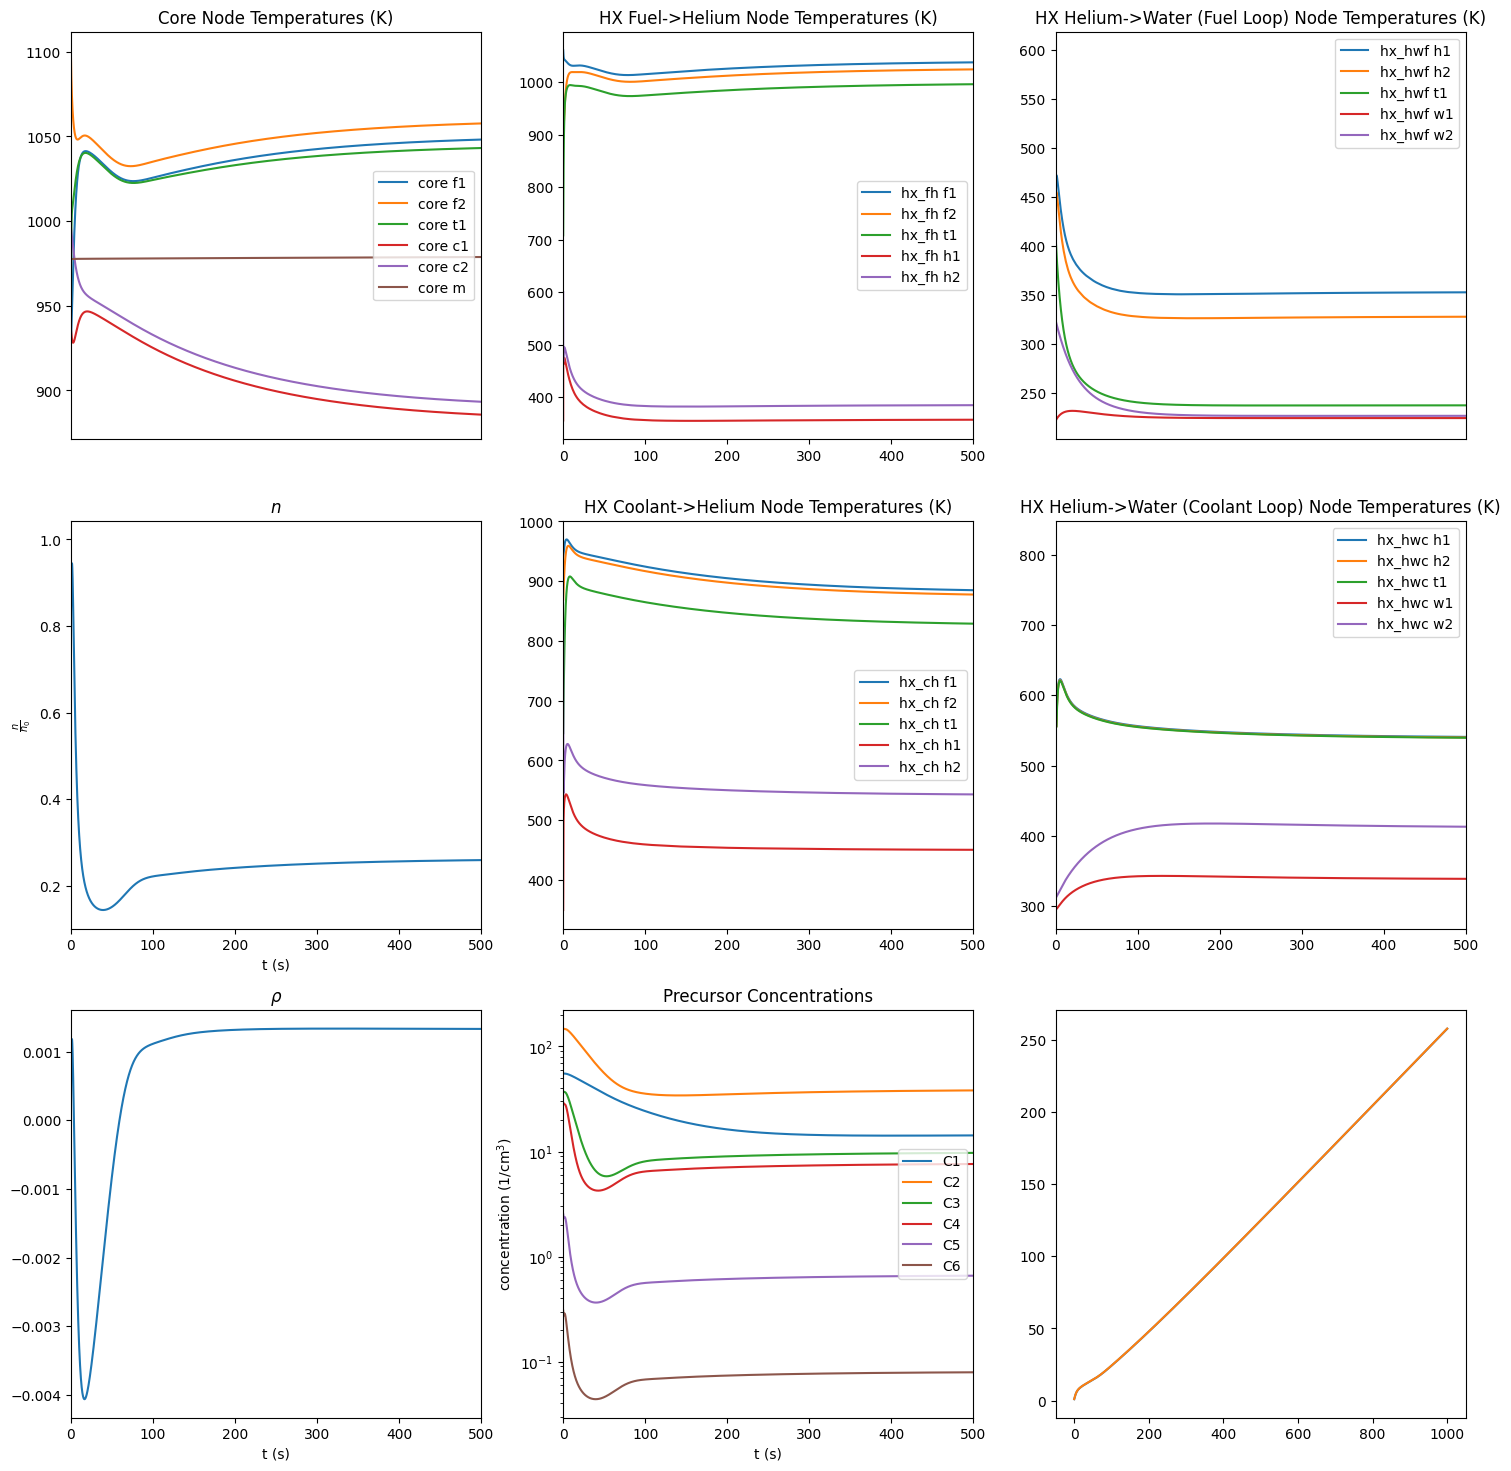

In [6]:
fig,axs = plt.subplots(3,3,figsize=(18,18))

t_0 = 0.0
t_f = 500


axs[0,0].set_xlim([t_0,t_f])
axs[0,0].plot(T,[s[0] for s in sol_jit],label="core f1") 
axs[0,0].plot(T,[s[1] for s in sol_jit],label="core f2") 
axs[0,0].plot(T,[s[2] for s in sol_jit],label="core t1")  
axs[0,0].plot(T,[s[3] for s in sol_jit],label="core c1")
axs[0,0].plot(T,[s[4] for s in sol_jit],label="core c2")
axs[0,0].plot(T,[s[5] for s in sol_jit],label="core m")
axs[0,0].legend()
axs[0,0].set_title("Core Node Temperatures (K)")
axs[0,0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


axs[0,1].set_xlim([t_0,t_f])
# axs[0,1].set_ylim([650,750])
axs[0,1].plot(T,[s[6] for s in sol_jit],label="hx_fh f1") 
axs[0,1].plot(T,[s[7] for s in sol_jit],label="hx_fh f2") 
axs[0,1].plot(T,[s[8] for s in sol_jit],label="hx_fh t1")  
axs[0,1].plot(T,[s[9] for s in sol_jit],label="hx_fh h1")
axs[0,1].plot(T,[s[10] for s in sol_jit],label="hx_fh h2")
axs[0,1].legend()
axs[0,1].set_title("HX Fuel->Helium Node Temperatures (K)")
#axs[0,1].tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off

# fuel temps
axs[0,2].set_xlim([t_0,t_f])
axs[0,2].plot(T,[s[16] for s in sol_jit],label="hx_hwf h1") 
axs[0,2].plot(T,[s[17] for s in sol_jit],label="hx_hwf h2") 
axs[0,2].plot(T,[s[18] for s in sol_jit],label="hx_hwf t1")  
axs[0,2].plot(T,[s[19] for s in sol_jit],label="hx_hwf w1")
axs[0,2].plot(T,[s[20] for s in sol_jit],label="hx_hwf w2")
axs[0,2].legend()
axs[0,2].set_title("HX Helium->Water (Fuel Loop) Node Temperatures (K)")
axs[0,2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# fuel temps
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,[s[11] for s in sol_jit],label="hx_ch f1") 
axs[1,1].plot(T,[s[12] for s in sol_jit],label="hx_ch f2") 
axs[1,1].plot(T,[s[13] for s in sol_jit],label="hx_ch t1")  
axs[1,1].plot(T,[s[14] for s in sol_jit],label="hx_ch h1")
axs[1,1].plot(T,[s[15] for s in sol_jit],label="hx_ch h2")
axs[1,1].legend()
axs[1,1].set_title("HX Coolant->Helium Node Temperatures (K)")

# fuel temps
axs[1,2].set_xlim([t_0,t_f])
axs[1,2].plot(T,[s[21] for s in sol_jit],label="hx_hwc h1") 
axs[1,2].plot(T,[s[22] for s in sol_jit],label="hx_hwc h2") 
axs[1,2].plot(T,[s[23] for s in sol_jit],label="hx_hwc t1")  
axs[1,2].plot(T,[s[24] for s in sol_jit],label="hx_hwc w1")
axs[1,2].plot(T,[s[25] for s in sol_jit],label="hx_hwc w2")
axs[1,2].legend()
axs[1,2].set_title("HX Helium->Water (Coolant Loop) Node Temperatures (K)")

axs[1,0].plot(T,[s[26] for s in sol_jit],label="n") 
axs[1,0].set_xlabel("t (s)")
axs[1,0].set_title(r"$n$")
axs[1,0].set_ylabel(r"$\frac{n}{n_0}$")
axs[1,0].set_xlim([t_0,t_f])

axs[2,0].plot(T,[s[33] for s in sol_jit],label="n") 
axs[2,0].set_xlabel("t (s)")
axs[2,0].set_title(r"$\rho$")
axs[2,0].set_xlim([t_0,t_f])

axs[2,1].plot(T,[s[27] for s in sol_jit],label="C1") 
axs[2,1].plot(T,[s[28] for s in sol_jit],label="C2") 
axs[2,1].plot(T,[s[29] for s in sol_jit],label="C3")  
axs[2,1].plot(T,[s[30] for s in sol_jit],label="C4")
axs[2,1].plot(T,[s[31] for s in sol_jit],label="C5")
axs[2,1].plot(T,[s[32] for s in sol_jit],label="C6")
axs[2,1].legend()
axs[2,1].set_xlabel("t (s)")
axs[2,1].set_yscale("log")
axs[2,1].set_ylabel(r"concentration (1/cm$^3$)")
axs[2,1].legend(loc="right")
axs[2,1].set_title("Precursor Concentrations")
axs[2,1].set_xlim([t_0,t_f])

axs[2,2].plot(T,[s[34] for s in sol_jit],label="pow f1")
axs[2,2].plot(T,[s[35] for s in sol_jit],label="pow f2")
#axs[2,2].plot(T,[s[36] for s in sol_jit],label="flow f1")
#axs[2,2].plot(T,[s[37] for s in sol_jit],label="flow f2")
#axs[2,2].plot(T,[s[38] for s in sol_jit],label="cht f1")
#axs[2,2].plot(T,[s[39] for s in sol_jit],label="cht f2")
#axs[2,2].plot(T,[sum([s[34],s[36],s[38]]) for s in sol_jit],label="sum f1")
#axs[2,2].plot(T,[sum([s[35],s[37],s[39]]) for s in sol_jit],label="sum f2")
#axs[2,2].legend()

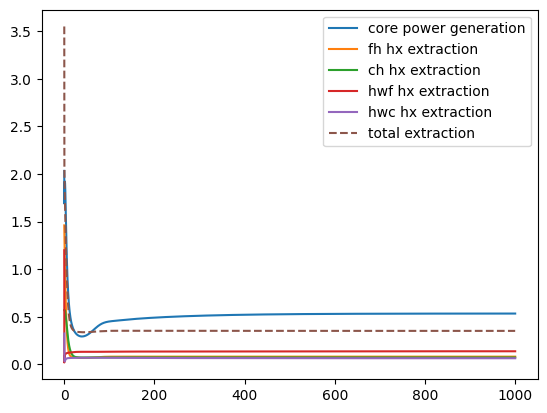

In [7]:
# power generation from fission 

# core power generation
pow_f1 = [k_f1*P*s[26] for s in sol_jit]
pow_f2 = [k_f2*P*s[26] for s in sol_jit]
tot_pow = np.add(pow_f1,pow_f2)

# heat extracted by fuel-helium hx
fh_ex = [(s[1]-s[0])*W_f*scp_f for s in sol_jit]

# heat extracted by coolant-helium hx
ch_ex = [(s[4]-s[3])*W_c*scp_c for s in sol_jit]

# helium-> water (fuel loop)
hwf_ex = [(s[10]-s[9])*W_h_fh*scp_h for s in sol_jit]

# helium-> water (coolant loop)
hwc_ex = [(s[15]-s[14])*W_h_ch*scp_h for s in sol_jit]

tot_ex = [fh_ex[i]+ch_ex[i]+hwf_ex[i]+hwc_ex[i] for i in range(len(sol_jit))]

plt.plot(T,tot_pow,label="core power generation")
plt.plot(T,fh_ex,label="fh hx extraction")
plt.plot(T,ch_ex,label="ch hx extraction")
plt.plot(T,hwf_ex,label="hwf hx extraction")
plt.plot(T,hwc_ex,label="hwc hx extraction")
plt.plot(T,tot_ex,label="total extraction",linestyle="--")
plt.legend()


(0.0, 1.2)

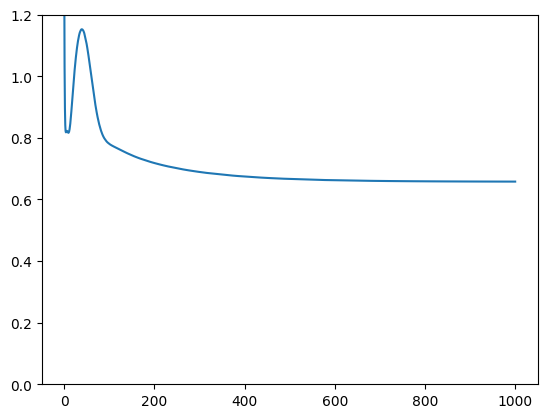

In [8]:
rate_ex = np.divide(tot_ex,tot_pow)
plt.plot(T,rate_ex)
plt.ylim([0,1.2])